# Setup

In [52]:
import pandas as pd
import polars as pl 
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from tools import preprocess, get_corpus_list
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (confusion_matrix)

from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [4]:
data = pl.read_csv("./dataset.csv")

In [5]:
data.head()

app_id,app_name,review_text,review_score,review_votes
i64,str,str,i64,i64
10,"""Counter-Strike""","""Ruined my life.""",1,0
10,"""Counter-Strike""","""This will be more of a ''my ex…",1,1
10,"""Counter-Strike""","""This game saved my virginity.""",1,0
10,"""Counter-Strike""","""• Do you like original games? …",1,0
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1


In [6]:
data.shape

(6417106, 5)

In [7]:
data["review_score"].value_counts()["review_score"]

review_score
i64
-1
1


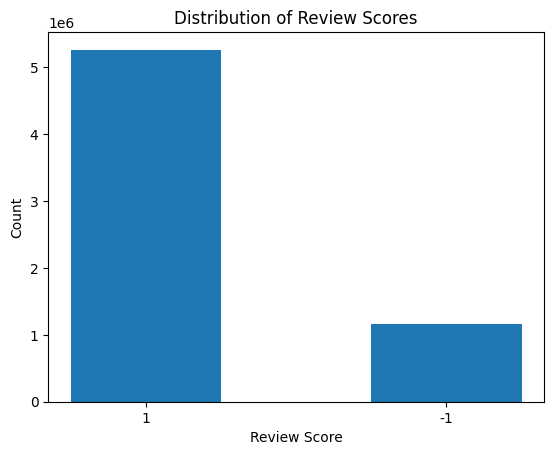

In [8]:
value_counts = data["review_score"].value_counts()
cols = value_counts["review_score"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.5)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

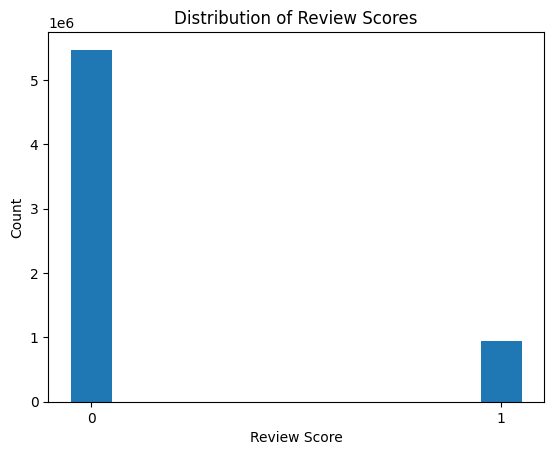

In [9]:
value_counts = data["review_votes"].value_counts()
cols = value_counts["review_votes"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.1)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Tien xu ly du lieu

In [10]:
data.null_count()

app_id,app_name,review_text,review_score,review_votes
u32,u32,u32,u32,u32
0,183234,7305,0,0


In [11]:
data.null_count()*100/len(data)

app_id,app_name,review_text,review_score,review_votes
f64,f64,f64,f64,f64
0.0,2.855399,0.113836,0.0,0.0


In [12]:
data["review_text"].null_count()/len(data)

0.0011383636174936177

In [13]:
data = data[:, ["review_text", "review_votes"]]

In [14]:
data = data.drop_nulls()

In [15]:
data.null_count()*100/len(data)

review_text,review_votes
f64,f64
0.0,0.0


In [16]:
data = data.unique()

In [17]:
data.shape

(4483987, 2)

## Chon 1/4 du lieu

In [18]:
small_data = data.sample(10_000, shuffle=True, seed=42)

In [19]:
X = small_data["review_text"]
y = small_data["review_votes"]

In [20]:
X = preprocess(X.to_numpy())

X = get_corpus_list(X)

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [22]:
X = X.toarray()

## Chia du lieu

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

## Chuan hoa

In [24]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

# ML

## Logistic

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)
log_cfs_mtx = confusion_matrix(log_pred, y_test)

<Axes: >

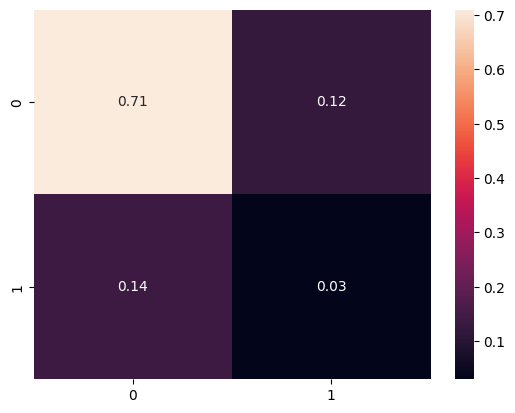

In [26]:
sns.heatmap(log_cfs_mtx/np.sum(log_cfs_mtx), annot=True)

## KNN

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_cfs_mtx = confusion_matrix(knn_pred, y_test)

<Axes: >

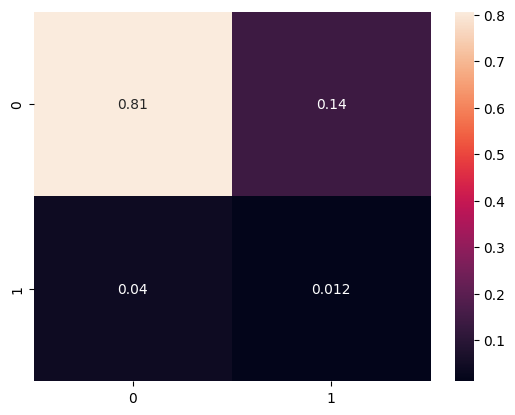

In [28]:
sns.heatmap(knn_cfs_mtx/np.sum(knn_cfs_mtx), annot=True)

# RNN

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, stratify=y)

In [54]:
MAX_WORDS = 5000

tokenizer = Tokenizer(num_words=MAX_WORDS)  
tokenizer.fit_on_texts(X_train)  

seq_train = tokenizer.texts_to_sequences(X_train)  
seq_test = tokenizer.texts_to_sequences(X_test)  

In [55]:
MAX_LEN = 200

seq_train = sequence.pad_sequences(seq_train, maxlen=MAX_LEN)
seq_test = sequence.pad_sequences(seq_test, maxlen=MAX_LEN)

In [56]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(MAX_WORDS,
                        embd_len,
                        input_length=MAX_WORDS))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(seq_train, y_train,
                        batch_size=64,
                        epochs=5,
                        verbose=1,
                        validation_data=(seq_test, y_test))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(seq_test, y_test, verbose=0))


/home/an/miniconda3/envs/nlp/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8191 - loss: 0.4649 - val_accuracy: 0.8472 - val_loss: 0.4407
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8500 - loss: 0.4158 - val_accuracy: 0.8472 - val_loss: 0.4288
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8554 - loss: 0.3541 - val_accuracy: 0.1972 - val_loss: 1.1614
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.7322 - loss: 0.5158 - val_accuracy: 0.8472 - val_loss: 0.4313
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8479 - loss: 0.3742 - val_accuracy: 0.8472 - val_loss: 0.4361

Simple_RNN Score--->  [0.43608787655830383, 0.8471999764442444]
